<a href="https://colab.research.google.com/github/danielgrgurevic/Diplomado_bigdata_machine_learning/blob/main/Respuestas_Miniproyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Solución Cerrada de Regresión Lineal

## a)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Fijar la semilla aleatoria
np.random.seed(42)

# Generar 100 datos que se encuentran entre 0 y 3
x = np.random.rand(100)*3

print(x[:10])

[1.12362036 2.85214292 2.19598183 1.79597545 0.46805592 0.46798356
 0.17425084 2.59852844 1.80334504 2.12421773]


## b)

In [ ]:
u = np.random.uniform(-2, 5, 100)
y = 5 + 2*x + u
print("x:", x[:5])
print("y:", y[:5])

x: [1.12362036 2.85214292 2.19598183 1.79597545 0.46805592]
y: [ 5.46724501 13.15915872  9.59245552 10.15194574 10.28907716]


In [ ]:
print(x.shape)
print(y.shape)

(100,)
(100,)


## c)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

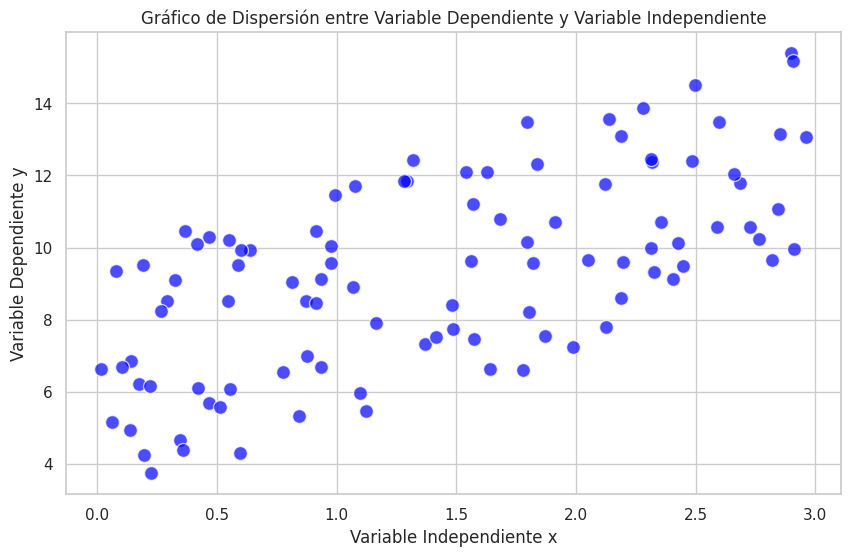

In [ ]:
sns.set(style="whitegrid")


# Crear gráfico de dispersión
plt.figure(figsize = (10, 6))
plt.scatter(x, y, color = "blue", alpha = 0.7, edgecolors = "w", s= 100)
plt.title("Gráfico de Dispersión entre Variable Dependiente y Variable Independiente")
plt.xlabel("Variable Independiente x")
plt.ylabel("Variable Dependiente y")
plt.grid(True)
plt.show()

## d)

In [ ]:
# Añade una columna de unos a X para el término de intersección
X_ = np.c_[np.ones((100, 1)), x]

In [ ]:
# Calcula los parámetros óptimos theta usando la fórmula de solución cerrada
theta_opt = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)

# Imprime los parámetros óptimos
print(f"Parámetros óptimos (intercepto y pendiente): {theta_opt.flatten()}")

Parámetros óptimos (intercepto y pendiente): [6.59518359 1.9217595 ]


In [ ]:
from sklearn.metrics import mean_squared_error

# Realiza predicciones en un nuevo rango de X
X_nuevo = np.array([[0], [3]])
X_nuevo_ = np.c_[np.ones((2, 1)), X_nuevo]
y_pred = X_nuevo_.dot(theta_opt)

# Calcula el error cuadrático medio (MSE)
y_pred_all = X_.dot(theta_opt)
mse = mean_squared_error(y, y_pred_all)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")


Error Cuadrático Medio (MSE): 4.16


## e)

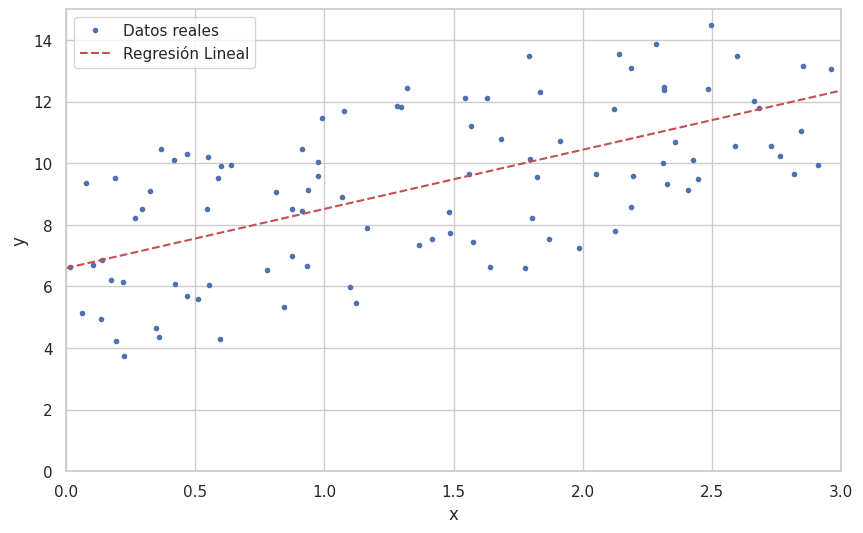

In [ ]:
# Gráfico de dispersión y línea de ajuste
plt.figure(figsize=(10, 6))
plt.plot(x, y, "b.", label="Datos reales")
plt.plot(X_nuevo, y_pred, "r--", label="Regresión Lineal")
plt.ylabel('y')
plt.xlabel('x')
plt.axis([0, 3, 0, 15])
plt.legend()
plt.show()

# **2- REGRESIÓN POLINOMIAL**

## **a)**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data science/Diplomado/Python para Machine Learning/M2/ts.csv")

In [ ]:
df.head()

,tiempo,magnitud
828,0.332508,-0.475521
426,-0.543721,-0.591832
208,-1.009149,0.664333
207,-1.009334,0.582915
158,-1.080630,-0.572447


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 828 to 1218
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tiempo    1000 non-null   float64
 1   magnitud  1000 non-null   float64
dtypes: float64(2)
memory usage: 23.4 KB


In [ ]:
df.reset_index(drop=True)

,tiempo,magnitud
0,0.332508,-0.475521
1,-0.543721,-0.591832
2,-1.009149,0.664333
3,-1.009334,0.582915
4,-1.080630,-0.572447
...,...,...
995,1.372963,-1.208284
996,0.299023,-0.777931
997,1.287071,-0.041291
998,0.691556,1.734400


In [ ]:
df.describe()

,tiempo,magnitud
count,1.000000e+03,1.000000e+03
mean,5.115908e-16,-2.486900e-17
std,1.000000e+00,1.000000e+00
min,-1.407639e+00,-4.779051e+00
25%,-8.361871e-01,-5.579082e-01
50%,-2.522878e-01,-8.587676e-02
75%,6.887333e-01,4.869581e-01
max,2.554198e+00,1.015924e+01


In [ ]:
# Tomar una muestra de 200 datos
sample_df = df.sample(n=200, random_state=42)

In [ ]:
sample_df.head()

,tiempo,magnitud
1031,0.987243,0.865940
561,-0.325067,-0.696513
116,-1.145798,-0.227389
634,-0.250976,-0.397980
1013,0.942066,1.148965


## **b)**

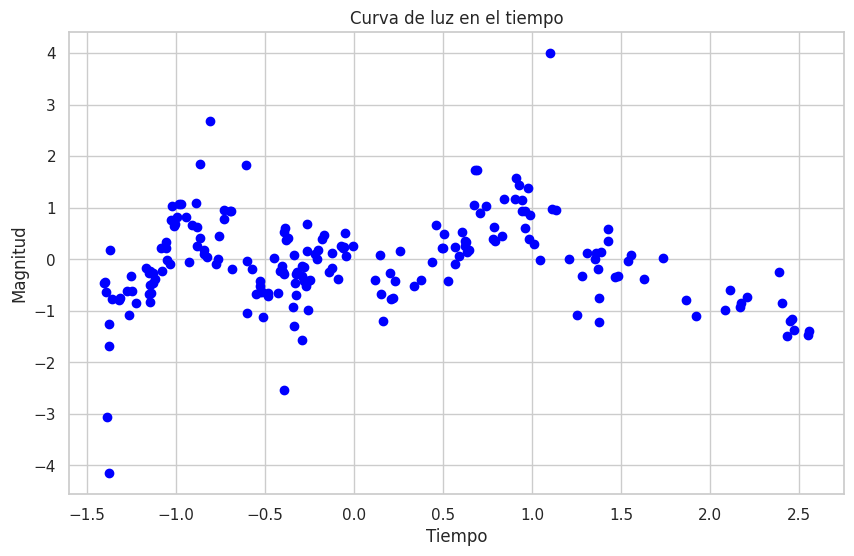

In [ ]:
# Vizualizar
plt.figure(figsize=(10,6))
plt.scatter(sample_df["tiempo"], sample_df["magnitud"], color = "blue")
plt.title("Curva de luz en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()

## c)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polinomio = PolynomialFeatures(degree = 8)

x = sample_df['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x)

In [ ]:
data_poly

array([[ 1.00000000e+00,  9.87242566e-01,  9.74647883e-01, ...,
         9.25855545e-01,  9.14044004e-01,  9.02383148e-01],
       [ 1.00000000e+00, -3.25066828e-01,  1.05668443e-01, ...,
         1.17987479e-03, -3.83538155e-04,  1.24675531e-04],
       [ 1.00000000e+00, -1.14579833e+00,  1.31285382e+00, ...,
         2.26281537e+00, -2.59273008e+00,  2.97074581e+00],
       ...,
       [ 1.00000000e+00, -9.75895953e-01,  9.52372912e-01, ...,
         8.63815720e-01, -8.42994265e-01,  8.22674692e-01],
       [ 1.00000000e+00, -1.06028702e+00,  1.12420857e+00, ...,
         1.42082526e+00, -1.50648259e+00,  1.59730393e+00],
       [ 1.00000000e+00, -2.63785545e-01,  6.95828138e-02, ...,
         3.36903839e-04, -8.88703629e-05,  2.34427171e-05]])

## **d)**

## e)

A medida que aumentan los grados de los polinomios, el modelo se vuelve más capaz de ajustarse a las particularidades de los datos, lo que aumenta su variabilidad. Sin embargo, el modelo de grado 1 muestra un alto sesgo, lo que significa que no captura bien las fluctuaciones en los datos a lo largo del tiempo y produce predicciones imprecisas. Por otro lado, el modelo de grado 12, aunque ajusta casi perfectamente los datos de entrenamiento, su alta varianza lo hace susceptible al sobreajuste, perdiendo capacidad de generalización. El modelo de grado 8, en cambio, parece ofrecer un buen equilibrio entre sesgo y varianza, capturando adecuadamente la tendencia general de los datos sin sobreajustarse.

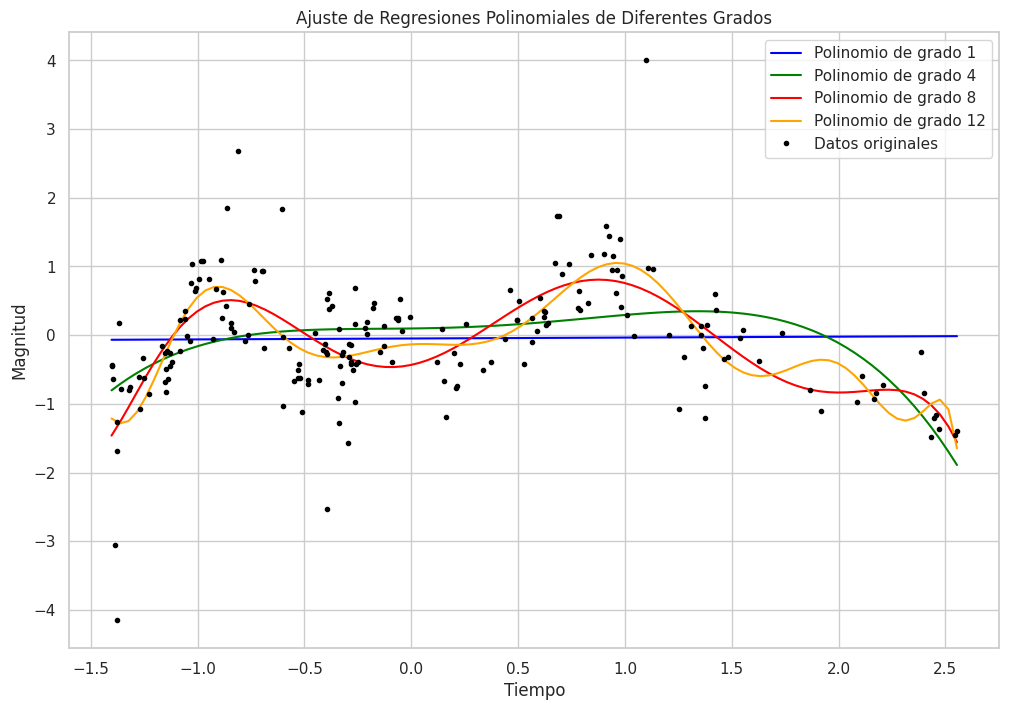

In [ ]:
# Variable independiente (tiempo) y dependiente (magnitud)
x = sample_df['tiempo'].values.reshape(-1,1)
y = sample_df['magnitud']

# Crear un rango de valores para la variable independiente (x) para la predicción
x_lin = np.linspace(min(x), max(x), 100).reshape(-1, 1)

# Grados de polinomios a ajustar
degrees = [1, 4, 8, 12]
colors = ['blue', 'green', 'red', 'orange']

# Graficar los modelos
plt.figure(figsize=(12, 8))

for i, degree in enumerate(degrees):
    # Crear características polinómicas de acuerdo al grado
    polinomio = PolynomialFeatures(degree=degree)
    data_poly = polinomio.fit_transform(x)

    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(data_poly, y)

    # Transformar x_lin para la predicción y hacer la predicción
    data_poly_plot = polinomio.fit_transform(x_lin)
    y_pred = model.predict(data_poly_plot)

    # Graficar el modelo ajustado
    plt.plot(x_lin, y_pred, color=colors[i], label=f'Polinomio de grado {degree}')

# Graficar los datos originales
plt.plot(x, y, '.', color='black', label='Datos originales')

# Añadir etiquetas y leyenda
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.title('Ajuste de Regresiones Polinomiales de Diferentes Grados')
plt.legend()
plt.grid(True)
plt.show()



# **3- Regresión con Penalización**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.799e+01, tolerance: 1.554e-02
  model = cd_fast.enet_coordinate_descent(


0.01
Ridge Intercepto y Coeficientes:
Intercepto: -0.19581784162257337
Coeficientes: [ 0.          0.45609766  1.50788948 -0.34794728 -0.84269681 -0.07008438
  0.05495523  0.15344228 -0.04815111]

Lasso Intercepto y Coeficientes:
Intercepto: 0.018228269305232525
Coeficientes: [ 0.        0.       -0.        0.       -0.        0.       -0.
  0.       -0.000931]
0.1
Ridge Intercepto y Coeficientes:
Intercepto: -0.19581784162257337
Coeficientes: [ 0.          0.45609766  1.50788948 -0.34794728 -0.84269681 -0.07008438
  0.05495523  0.15344228 -0.04815111]

Lasso Intercepto y Coeficientes:
Intercepto: 0.018228269305232525
Coeficientes: [ 0.        0.       -0.        0.       -0.        0.       -0.
  0.       -0.000931]
1
Ridge Intercepto y Coeficientes:
Intercepto: -0.19581784162257337
Coeficientes: [ 0.          0.45609766  1.50788948 -0.34794728 -0.84269681 -0.07008438
  0.05495523  0.15344228 -0.04815111]

Lasso Intercepto y Coeficientes:
Intercepto: 0.018228269305232525
Coeficientes:

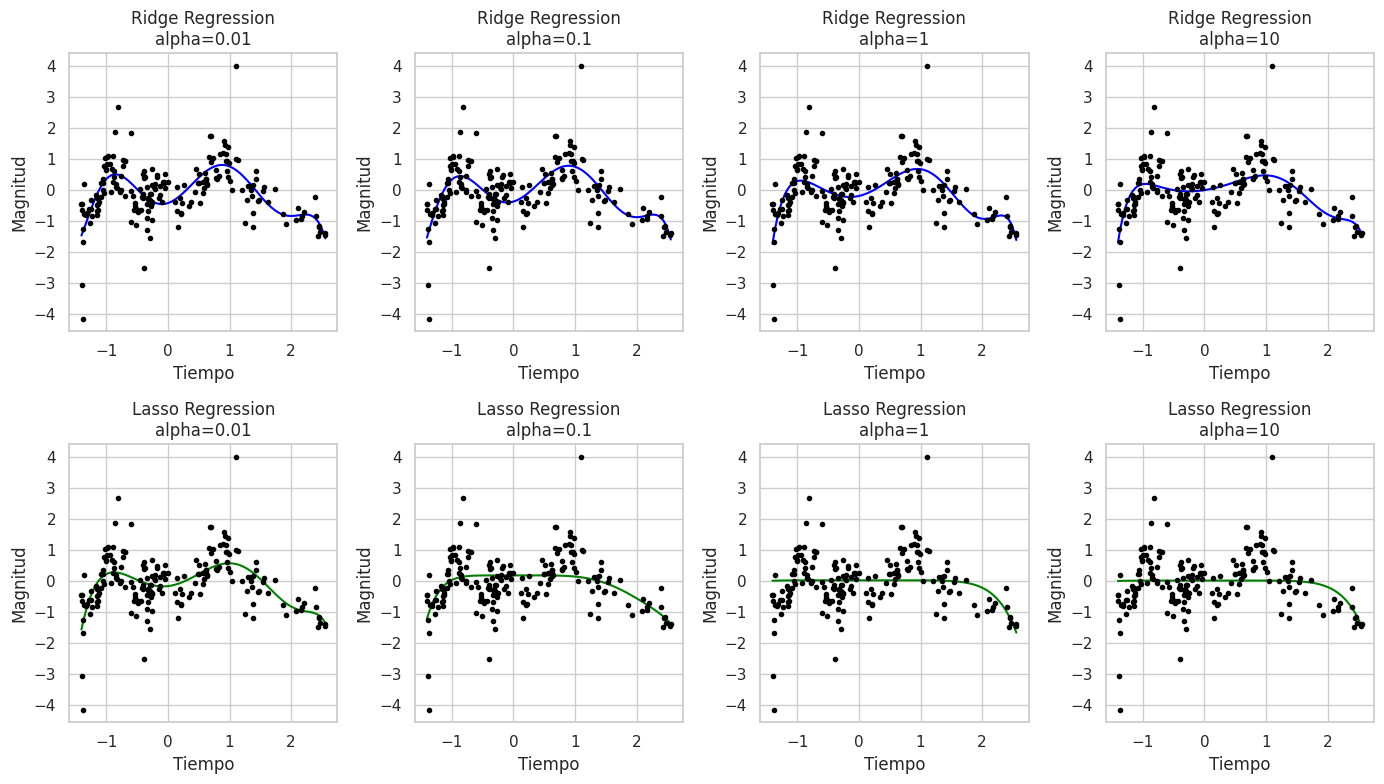

In [ ]:
from sklearn.linear_model import Ridge, Lasso
# Variable independiente (tiempo) y dependiente (magnitud)
x = sample_df['tiempo'].values.reshape(-1,1)
y = sample_df['magnitud']

# Crear un rango de valores para la variable independiente (x) para la predicción
x_lin = np.linspace(min(x), max(x), 100).reshape(-1, 1)

# Crear características polinómicas de grado 8
polinomio = PolynomialFeatures(degree=8)
data_poly = polinomio.fit_transform(x)
data_poly_plot = polinomio.fit_transform(x_lin)

# Diferentes valores de penalización
alphas = [0.01, 0.1, 1, 10]

# Graficar los modelos para Ridge y Lasso
plt.figure(figsize=(14, 8))

for i, alpha in enumerate(alphas):
    # Ajustar el modelo Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(data_poly, y)
    y_pred_ridge = ridge.predict(data_poly_plot)

    # Ajustar el modelo Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(data_poly, y)
    y_pred_lasso = lasso.predict(data_poly_plot)

    # Graficar Ridge
    plt.subplot(2, len(alphas), i + 1)
    plt.plot(x_lin, y_pred_ridge, color='blue', label=f'Ridge (alpha={alpha})')
    plt.plot(x, y, '.', color='black')
    plt.title(f'Ridge Regression\nalpha={alpha}')
    plt.xlabel('Tiempo')
    plt.ylabel('Magnitud')
    plt.grid(True)

    # Graficar Lasso
    plt.subplot(2, len(alphas), i + 1 + len(alphas))
    plt.plot(x_lin, y_pred_lasso, color='green', label=f'Lasso (alpha={alpha})')
    plt.plot(x, y, '.', color='black')
    plt.title(f'Lasso Regression\nalpha={alpha}')
    plt.xlabel('Tiempo')
    plt.ylabel('Magnitud')
    plt.grid(True)


    print(alpha)
    print("Ridge Intercepto y Coeficientes:")
    print(f"Intercepto: {ridge_intercept}")
    print(f"Coeficientes: {ridge_coefficients}\n")

    print("Lasso Intercepto y Coeficientes:")
    print(f"Intercepto: {lasso_intercept}")
    print(f"Coeficientes: {lasso_coefficients}")


plt.tight_layout()
plt.show()

# Obtener los parámetros (intercepto y coeficientes) de los modelos para alpha = 1
ridge_model = Ridge(alpha=1)
ridge_model.fit(data_poly, y)
ridge_intercept, ridge_coefficients = ridge_model.intercept_, ridge_model.coef_

lasso_model = Lasso(alpha=1, max_iter=10000)
lasso_model.fit(data_poly, y)
lasso_intercept, lasso_coefficients = lasso_model.intercept_, lasso_model.coef_


Al aumentar el alpha los coeficientes en ridge van dismuyendo lo que va suavizando la curva del modelo y dismunuye la variabilidad.
Lasso elimina de golpe los coeficientes simplificando el modelo y dando origen a un modelo más simple.

# **4- Clasificación de estrellas variables**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data science/Diplomado/Python para Machine Learning/M2/ts2.csv")

In [ ]:
 df.head()

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,lpv,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,lpv,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,ecl,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,lpv,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,lpv,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class             5000 non-null   object 
 1   Amplitude         5000 non-null   float64
 2   AndersonDarling   5000 non-null   float64
 3   Autocor_length    5000 non-null   int64  
 4   Beyond1Std        5000 non-null   float64
 5   Gskew             5000 non-null   float64
 6   LinearTrend       5000 non-null   float64
 7   MaxSlope          5000 non-null   float64
 8   Mean              5000 non-null   float64
 9   Meanvariance      5000 non-null   float64
 10  MedianAbsDev      5000 non-null   float64
 11  MedianBRP         5000 non-null   float64
 12  PercentAmplitude  5000 non-null   float64
 13  PeriodLS          5000 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 547.0+ KB


In [ ]:
df["Class"].unique()

array(['lpv', 'ecl', 'rrlyr', 'cep', 'NonVar', 'dsct', 't2cep', 'dpv',
       'acep'], dtype=object)

In [ ]:
# Definir el mapeo de categorías a números
class_mapping = {
    'lpv': 0,
    'ecl': 1,
    'rrlyr': 2,
    'cep': 3,
    'NonVar': 4,
    'dsct': 5,
    't2cep': 6,
    'dpv': 7,
    'acep': 8
}

# Reemplazar los valores en la columna 'Class' usando el mapeo
df['Class'] = df['Class'].map(class_mapping)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class             5000 non-null   int64  
 1   Amplitude         5000 non-null   float64
 2   AndersonDarling   5000 non-null   float64
 3   Autocor_length    5000 non-null   int64  
 4   Beyond1Std        5000 non-null   float64
 5   Gskew             5000 non-null   float64
 6   LinearTrend       5000 non-null   float64
 7   MaxSlope          5000 non-null   float64
 8   Mean              5000 non-null   float64
 9   Meanvariance      5000 non-null   float64
 10  MedianAbsDev      5000 non-null   float64
 11  MedianBRP         5000 non-null   float64
 12  PercentAmplitude  5000 non-null   float64
 13  PeriodLS          5000 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 547.0 KB


In [ ]:
df.head(10)

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,0,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,1,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,0,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,0,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
5,1,0.09250,0.000000,1,0.286667,0.0525,0.000004,20.114943,17.674943,0.002604,0.0285,0.423333,0.008461,3.101105
6,0,0.07325,0.000035,13,0.270270,0.0530,-0.000171,0.935620,13.223068,0.002724,0.0220,0.405405,0.008623,147.996247
7,2,0.22200,0.039383,1,0.297872,-0.0335,-0.000061,4.828199,15.904539,0.007964,0.0900,0.276596,0.016653,0.558561
8,0,0.06300,0.052098,3,0.310680,0.0175,-0.000054,0.088183,12.543311,0.002687,0.0220,0.281553,0.005982,47.769788
9,0,0.02000,0.012595,4,0.283333,0.0040,-0.000014,0.409165,12.904140,0.000805,0.0065,0.503333,0.003294,1394.064620


In [ ]:
df.describe()

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.478800,0.106905,0.130491,4.545400,0.317532,0.016345,0.000001,2.175457,14.988370,0.003703,0.039180,0.414658,0.010616,302.831851
std,1.001075,0.147896,0.202838,6.121163,0.060427,0.126287,0.000684,9.423721,1.889971,0.005527,0.062624,0.122715,0.014490,944.665723
min,0.000000,0.007000,0.000000,1.000000,0.070470,-1.763000,-0.016436,0.006402,11.666225,0.000259,0.002000,0.069444,0.000893,0.005627
25%,0.000000,0.021000,0.000016,1.000000,0.290000,-0.004000,-0.000015,0.096856,13.608853,0.000743,0.007000,0.336667,0.002375,0.987460
50%,0.000000,0.043500,0.020842,2.000000,0.318182,0.002500,-0.000002,0.342336,14.514339,0.001596,0.014000,0.411089,0.004850,18.144685
75%,0.000000,0.143500,0.185764,5.000000,0.348214,0.017000,0.000009,1.038683,15.592764,0.005258,0.051500,0.480000,0.014186,189.760635
max,8.000000,1.700500,0.980413,70.000000,0.536667,1.479000,0.033689,335.151515,21.099524,0.075959,1.025000,0.922034,0.171519,12870.875640


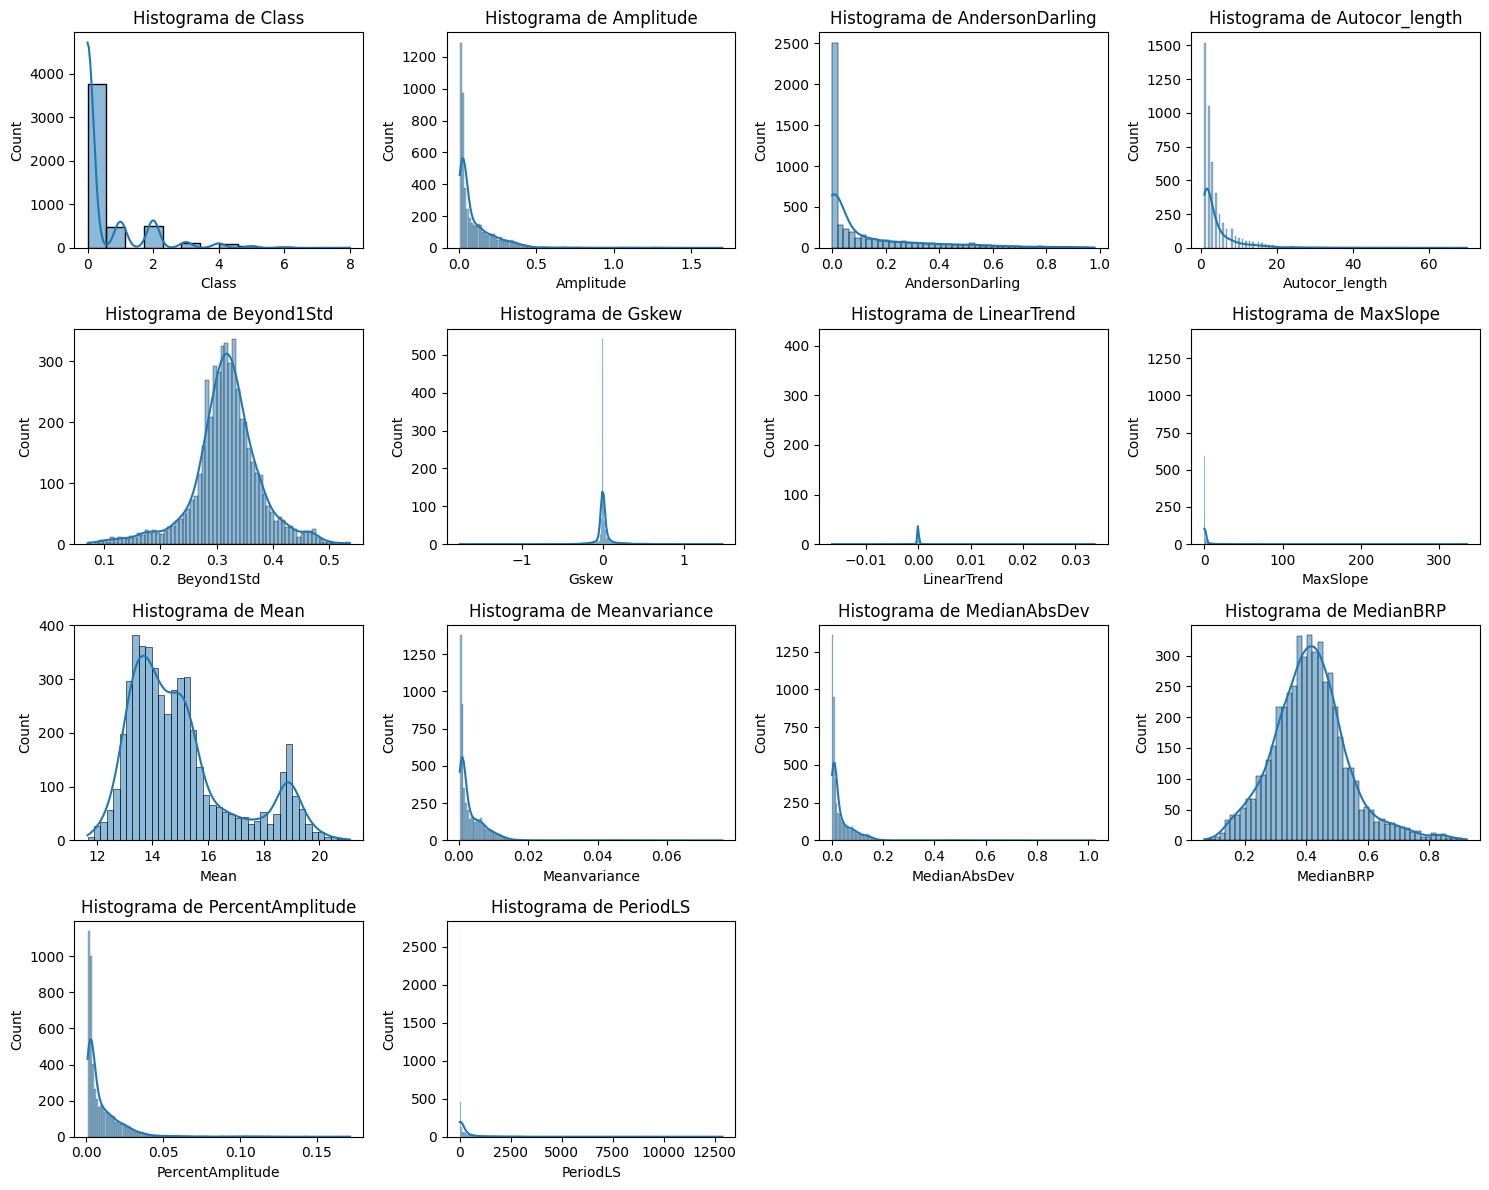

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear histogramas
plt.figure(figsize=(15, 12))

for i, column in enumerate(df.columns, start=1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histograma de {column}')

plt.tight_layout()
plt.show()


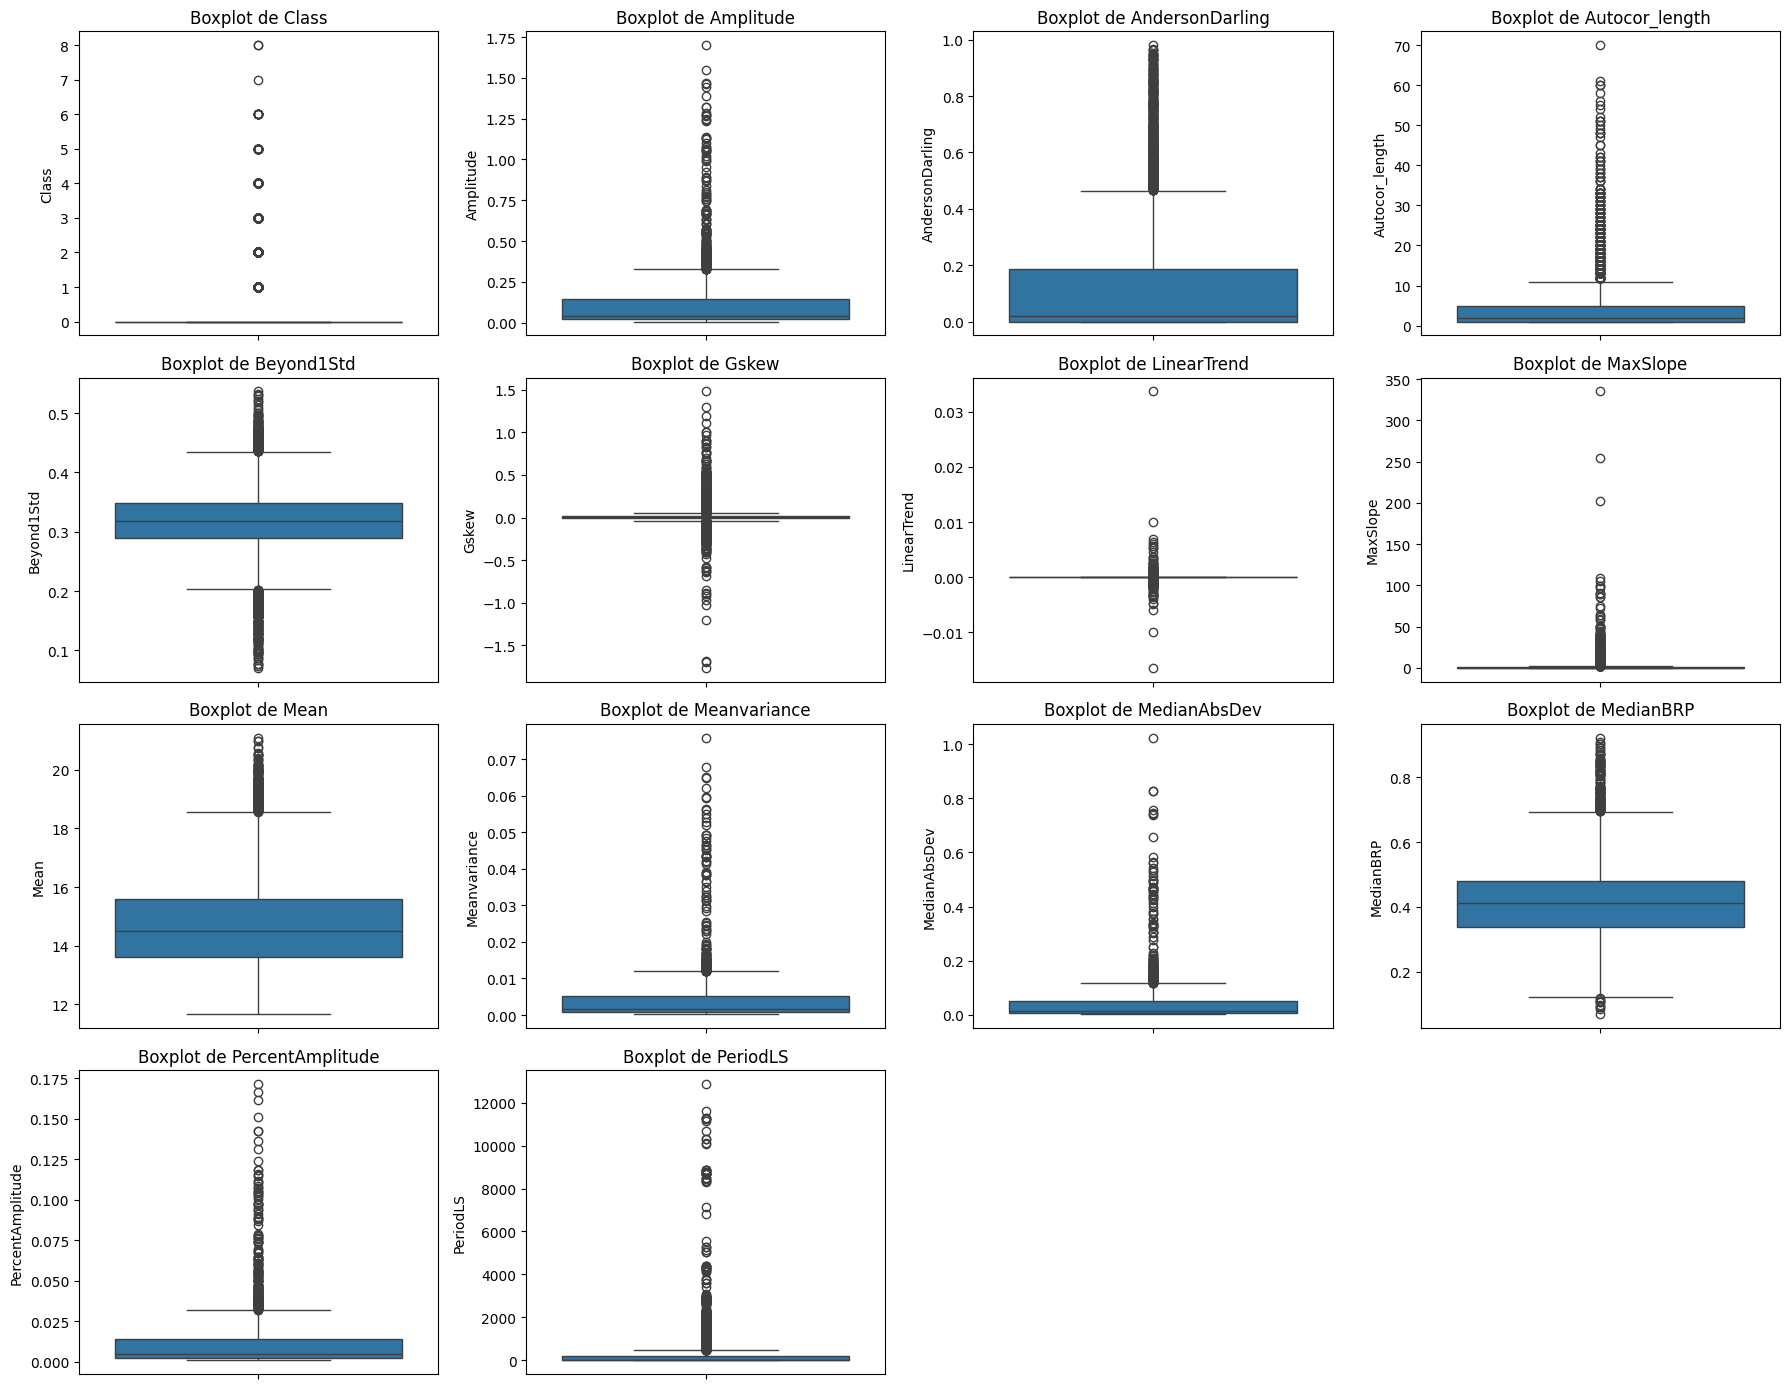

In [ ]:
# Crear boxplots para todas las columnas
plt.figure(figsize=(18, 14))

for i, column in enumerate(df.columns, start=1):
    plt.subplot(4, 4, i)
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot de {column}')
        plt.ylabel(column)
    else:
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot de {column}')
        plt.xlabel(column)

plt.tight_layout()
plt.show()


## Regresión Logística

 Al aumentar max_iter permite que el modelo ajuste mejor sus parámetros, resultando en una mayor precisión y recall, especialmente en clases con más ejemplos.

In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que 'df' es tu DataFrame y 'Class' es la columna objetivo
X = df.drop('Class', axis=1)
y = df['Class']

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicciones
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Evaluación
print("Regresión Logística - Conjunto de Entrenamiento")
print(classification_report(y_train, y_train_pred))

print("Regresión Logística - Conjunto de Prueba")
print(classification_report(y_test, y_test_pred))


Regresión Logística - Conjunto de Entrenamiento
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2624
           1       0.90      0.88      0.89       342
           2       0.84      0.97      0.90       368
           3       0.92      0.32      0.47        73
           4       0.00      0.00      0.00        57
           5       0.83      0.19      0.31        26
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.94      3500
   macro avg       0.50      0.37      0.39      3500
weighted avg       0.93      0.94      0.93      3500

Regresión Logística - Conjunto de Prueba
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1151
           1       0.91      0.89      0.90       142
           2       0.81      0.96      0.88

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# Definir los valores para el hiperparámetro max_iter
max_iter_values = [100, 500]

# Almacenar resultados
results = {}

for max_iter in max_iter_values:
    # Crear el modelo de regresión logística con el valor de max_iter
    log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=max_iter)
    log_reg.fit(X_train, y_train)

    # Predecir con el modelo en conjunto de prueba
    y_pred_test = log_reg.predict(X_test)

    # Predecir con el modelo en conjunto de entrenamiento
    y_pred_train = log_reg.predict(X_train)

    # Evaluar el rendimiento del modelo en conjunto de prueba
    report_test = classification_report(y_test, y_pred_test, output_dict=True)

    # Evaluar el rendimiento del modelo en conjunto de entrenamiento
    report_train = classification_report(y_train, y_pred_train, output_dict=True)

    # Almacenar los resultados
    results[max_iter] = {
        'classification_report_test': report_test,
        'classification_report_train': report_train,
    }

    print(f"\nResultados para max_iter={max_iter}:")
    print("Reporte de clasificación (prueba):")
    print(classification_report(y_test, y_pred_test))

    print("Reporte de clasificación (entrenamiento):")
    print(classification_report(y_train, y_pred_train))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit


Resultados para max_iter=100:
Reporte de clasificación (prueba):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1151
           1       0.72      0.47      0.57       142
           2       0.62      0.93      0.74       138
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4

    accuracy                           0.89      1500
   macro avg       0.33      0.34      0.33      1500
weighted avg       0.85      0.89      0.86      1500

Reporte de clasificación (entrenamiento):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2624
           1       0.75      0.55      0.63       342
           2       0.67      0.94      0.78       368
           3       0.00      0.00      0.00        73
           4       0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

## Random Forest

Cuando n_estimators se incrementa de 100 a 200, los resultados muestran que la precisión general se mantiene casi constante, y en algunos casos, el rendimiento de las clases minoritarias ha empeorado ligeramente. Esto sugiere que el modelo ya había alcanzado un punto de convergencia con 100 estimadores, donde agregar más árboles no contribuye significativamente a mejorar la precisión general del modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento con 100 estimadores

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluación
print("Random Forest - Conjunto de Entrenamiento")
print(classification_report(y_train, y_train_pred))

print("Random Forest - Conjunto de Prueba")
print(classification_report(y_test, y_test_pred))


Random Forest - Conjunto de Entrenamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2624
           1       1.00      1.00      1.00       342
           2       1.00      1.00      1.00       368
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

Random Forest - Conjunto de Prueba
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1151
           1       0.94      0.93      0.94       142
           2       0.95      0.96      0.95       138
 

In [ ]:
# Ahora probamos con 200 estimadores

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluación
print("Random Forest - Conjunto de Entrenamiento")
print(classification_report(y_train, y_train_pred))

print("Random Forest - Conjunto de Prueba")
print(classification_report(y_test, y_test_pred))

Random Forest - Conjunto de Entrenamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2624
           1       1.00      1.00      1.00       342
           2       1.00      1.00      1.00       368
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

Random Forest - Conjunto de Prueba
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1151
           1       0.96      0.93      0.94       142
           2       0.94      0.96      0.95       138
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Rango de valores para k
k_range = range(1, 21)
scores = []

# Evaluar el rendimiento para cada valor de k
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

# Imprimir los resultados
for k, score in zip(k_range, scores):
    print(f'k={k}: Accuracy={score:.4f}')

# Encontrar el mejor valor de k
best_k = k_range[np.argmax(scores)]
print(f'El mejor valor de k es {best_k} con una exactitud de {max(scores):.4f}')


k=1: Accuracy=0.9460
k=2: Accuracy=0.9427
k=3: Accuracy=0.9480
k=4: Accuracy=0.9487
k=5: Accuracy=0.9473
k=6: Accuracy=0.9487
k=7: Accuracy=0.9427
k=8: Accuracy=0.9460
k=9: Accuracy=0.9420
k=10: Accuracy=0.9413
k=11: Accuracy=0.9407
k=12: Accuracy=0.9407
k=13: Accuracy=0.9393
k=14: Accuracy=0.9393
k=15: Accuracy=0.9373
k=16: Accuracy=0.9367
k=17: Accuracy=0.9347
k=18: Accuracy=0.9360
k=19: Accuracy=0.9320
k=20: Accuracy=0.9333
El mejor valor de k es 4 con una exactitud de 0.9487


In [ ]:
# Ahora, entrenamos el modelo KNN con el mejor k y evaluamos en los conjuntos de prueba y entrenamiento
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Predecir en conjunto de prueba
y_pred_test = knn.predict(X_test)

# Predecir en conjunto de entrenamiento
y_pred_train = knn.predict(X_train)

# Evaluar rendimiento en conjunto de prueba
report_test = classification_report(y_test, y_pred_test, output_dict=True)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Evaluar rendimiento en conjunto de entrenamiento
report_train = classification_report(y_train, y_pred_train, output_dict=True)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)


print(f"\nResultados para k={best_k}:")

print("Reporte de clasificación (entrenamiento):")
print(classification_report(y_train, y_pred_train))

print("Reporte de clasificación (prueba):")
print(classification_report(y_test, y_pred_test))





Resultados para k=4:
Reporte de clasificación (entrenamiento):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2624
           1       0.89      0.85      0.87       342
           2       0.89      0.91      0.90       368
           3       0.90      0.77      0.83        73
           4       0.84      0.67      0.75        57
           5       1.00      0.35      0.51        26
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.96      3500
   macro avg       0.61      0.50      0.54      3500
weighted avg       0.95      0.96      0.95      3500

Reporte de clasificación (prueba):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1151
           1       0.85      0.76      0.80       142
           2       0.82      0.91

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## **f. Compare el rendimiento de los clasificadores, utilizando matrices de confusión y métricas vistas en el curso.**

El modelo con mejor desempeño fue random forest, como se ve en las matrices e confusion en el que logro clasificar de mejor manera. Evidenciado en la linea diagonal de las matrices.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Regresión Logística - Conjunto de Prueba
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1151
           1       0.91      0.89      0.90       142
           2       0.81      0.96      0.88       138
           3       0.86      0.35      0.50        34
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4

    accuracy                           0.95      1500
   macro avg       0.51      0.46      0.47      1500
weighted avg       0.93      0.95      0.93      1500



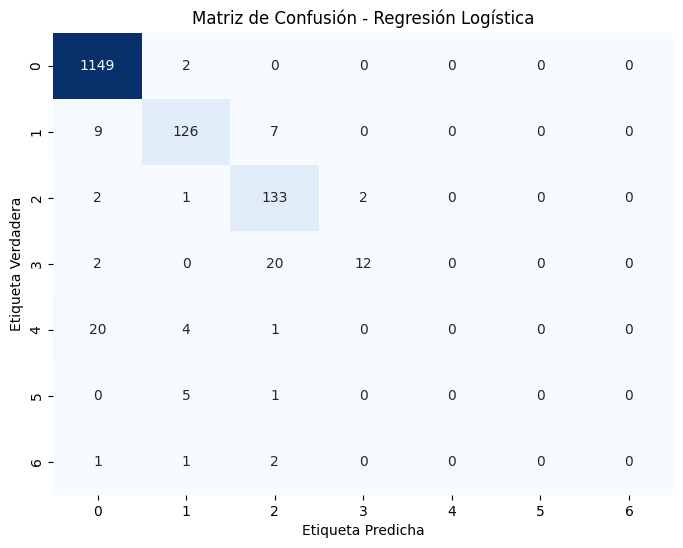

Random Forest - Conjunto de Prueba
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1151
           1       0.94      0.93      0.94       142
           2       0.95      0.96      0.95       138
           3       0.97      0.85      0.91        34
           4       0.92      0.88      0.90        25
           5       0.60      0.50      0.55         6
           6       1.00      0.25      0.40         4

    accuracy                           0.98      1500
   macro avg       0.91      0.77      0.80      1500
weighted avg       0.98      0.98      0.98      1500



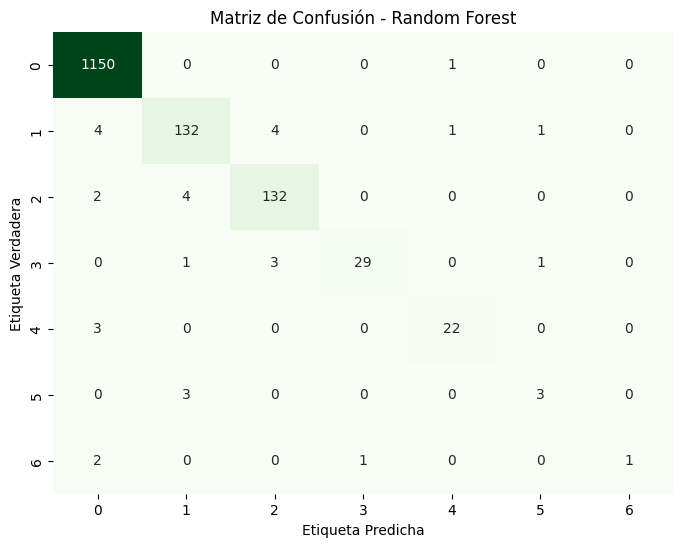

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


Resultados para k=4:
Reporte de clasificación (prueba):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1151
           1       0.85      0.76      0.80       142
           2       0.82      0.91      0.86       138
           3       0.83      0.71      0.76        34
           4       0.86      0.76      0.81        25
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         4

    accuracy                           0.95      1500
   macro avg       0.76      0.61      0.64      1500
weighted avg       0.95      0.95      0.95      1500



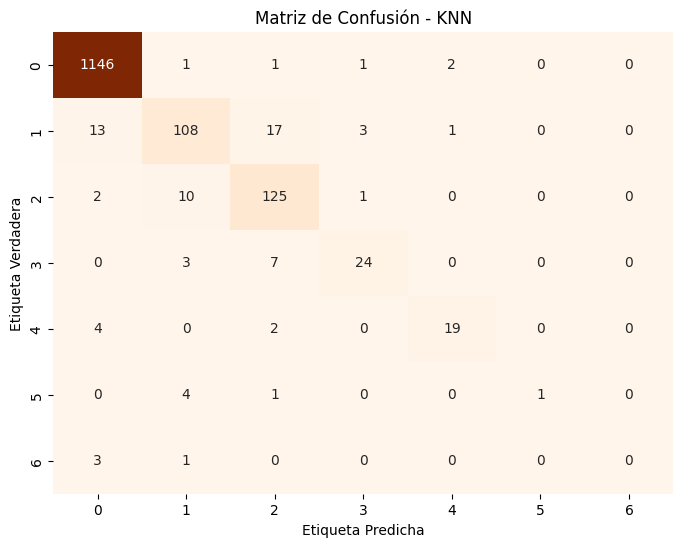

In [ ]:
# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicciones
y_test_pred = log_reg.predict(X_test)

# Evaluación
print("Regresión Logística - Conjunto de Prueba")
print(classification_report(y_test, y_test_pred))


# Matriz de Confusión para Regresión Logística
conf_matrix_log = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión - Regresión Logística")
plt.ylabel("Etiqueta Verdadera")
plt.xlabel("Etiqueta Predicha")
plt.show()

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_test_pred = rf.predict(X_test)

# Evaluación
print("Random Forest - Conjunto de Prueba")
print(classification_report(y_test, y_test_pred))

# Matriz de Confusión para Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Matriz de Confusión - Random Forest")
plt.ylabel("Etiqueta Verdadera")
plt.xlabel("Etiqueta Predicha")
plt.show()

# Ahora, entrenamos el modelo KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Predecir en conjunto de prueba
y_pred_test = knn.predict(X_test)

# Evaluar rendimiento en conjunto de prueba
report_test = classification_report(y_test, y_pred_test, output_dict=True)

print(f"\nResultados para k={4}:")

print("Reporte de clasificación (prueba):")
print(classification_report(y_test, y_pred_test))

# Matriz de Confusión para KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Matriz de Confusión - KNN")
plt.ylabel("Etiqueta Verdadera")
plt.xlabel("Etiqueta Predicha")
plt.show()
